### Pandas bevezető

A **pandas** (vagy importálás után inkább csak "pd" :) ) az egyik legelterjedtebb Python könyvtár adatkezelésre és -elemzésre.
Nagyon gyakran használt könyvtár például a pénzügyi világban...

### 1. Egyszerű adatkezelés

- A pandas `DataFrame` nevű objektumát használják a leggyakrabban. Ez egy táblázatot implementál...
- Könnyen lehet benne:
  - szűrni
  - rendezni
  - csoportosítani
  - aggregálni, csoportonként is.

### 2. Sokféle forrásból képes adatot beolvasni

Támogatott formátumok:

- CSV
- Excel
- JSON
- SQL
- Parquet
- Pickle
<br> Más szavakkal: nagyon sok formátumra van definiálva metódus, ami be tud olvasni adatot.
<br> -> Szemben a kurzus eddigi óráin látottakkal, nem kell nekünk írni valami loader-t.

### 3. Adatmanipulációs lehetőségek

- Hiányzó adatok kezelése (`df.fillna()`, `df.dropna()`)
- Dátumok konvertálása (`pd.to_datetime()`)
- Adattípusok módosítása (`df.astype()`)
- Új változók készítése különböző logikák alapján.

### 4. Integráció más könyvtárakkal

- Könnyen kombinálható más népszerű csomagokkal/könyvtárakkal:
  - `NumPy` (~numerikus számítások)
  - `Matplotlib` (~ chartok, vizualizáció)
  - `Seaborn` (~ chartok, vizualizáció)
  - `Scikit-learn` (~ statisztikai számítások, gépi tanulás)
<br> A Pandas és Numpy között van egy nagyon szoros kapcsolat. A pd.DataFrame és pd.Series implementációja a numpy ndarray-t használja.
A Numpy alapú Pandas tekinthető az "alapbeállításnak"... A Pandas 2.0 tud már Apache Arrow alapon is működni. Ez utóbbi szemben a Numpy-al, paralellizálható és sok esetben hatékonyabb a memória használata.

### 5. "Relatíve" gyors és hatékony

- Optimalizált működés belsőleg (C-nyelvű alapokra épül).
- Közepes méretű adatokkal gyorsan dolgozik, és hatékony memóriakezelést biztosít.
<br> Csodát azért nem lehet várni lásd:
<br> https://www.datacamp.com/tutorial/high-performance-data-manipulation-in-python-pandas2-vs-polars

### 6. Használják és jól dokumentált

- Rengeteg tutorial, példa és Stack Overflow válasz érhető el.
- Részletes dokumentáció: [https://pandas.pydata.org/docs](https://pandas.pydata.org/docs)



### A Pandas kritikája


<p><b>Teljesítmény nagy adathalmazok esetén</b>
   <br>A Pandas nem mindig hatékony, ha nagyon nagy adatokkal dolgozunk, mive a leggyakrabban használt Numpy alapú verzió nem párhuzamosított. Ezért sokan inkább olyan alternatívákat választanak, mint például a Dask vagy a Polars.
   Nagyjából milliós nagyságrendű rekord szám (és kb. egy tucat változó) esetén kezdenek bajok lenni a teljesítménnyel...
   </p>
<p><b>Memóriahasználat</b>
   <br>A Pandas gyakran jelentős mennyiségű memóriát igényel, ami problémát okozhat korlátozott erőforrásokkal rendelkező rendszereken.
   Minden pd.DataFrame, amit létrehoznuk egy ipython notebook-ban, sok memória területet le tud foglalni...
   </p>

<p><b>API komplexitása</b>
   <br>Az API (azaz a DataFrame-re megírt metódusok...) néha zavaró lehet, különösen kezdők számára. Például a `loc`, `iloc` és `ix` használata nem mindig egyértelmű, és a szintaxis néha túl bonyolultnak tűnik.</p>

<p><b>Multithreading (részleges) hiánya</b>
   <br>Egészen a pandas 2.0 megérkezéséig a Pandas-ban nem volt multithreading támogatás.</p>

<p><b>Hibakezelés</b>
   <br>A Pandas hibakezelése néha nem intuitív, és a hibák diagnosztizálása időigényes lehet.
   Gyakori hibák lehetnek például az egyes változók manipulációja során az adattípusokból következő hibák... </p>


### Illusztráció

In [ ]:
# Pokémon dataset:
# https://www.kaggle.com/datasets/abcsds/pokemon

In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import Image

print(f"Az én pandas verzióm: {pd.__version__}")

Az én pandas verzióm: 2.2.3


In [5]:
pokemons = pd.read_csv(Path().absolute() / "resources" / "Pokemon.csv")
display(pokemons.tail())
print(f"A tábla méret: {pokemons.shape}")
# igen az ipython notebookban szépen meg lehet jeleníteni a DataFrame-et, de nem az egészet.
# a .tail() metódus csak az utolsó 5 elemet mutatja meg.
# míg a .head() metódus az első 5-t.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


A tábla méret: (800, 13)


### Feladat

In [ ]:
# Számoljunk ki dolgokat:
# 1. Mennyi a "Type 1" == "Rock", típusú pokémonok átlagos HP-je,  Attack és Defense pontja?
# 2. Hogyan viszonyul a Legendary pokémonok Speed értékének a szórása a nem legendary pokémonok speed értékének a szórásához.
# 3. Mennyi a Hp, Attack, Defense stb változók: min, max, 25., 50., 75. percentilis értéke?
# 4. Igaz-e, hogy azoknak a pokémonoknak, ahol a "Type 2" nem üres, azaz van másodlagos típus is, több a total pontszáma, mint azoknál,
# amik szigorúan egy típusba tartoznak.

In [ ]:
# 5. Csináljunk egy Histogramot, ahol a Total értékeket ábrázoljuk...
# 6. Ábrázoljuk a legendary és nem legendary pokémonok átlagos HP, Attack és Defense értékét egy bar charton.

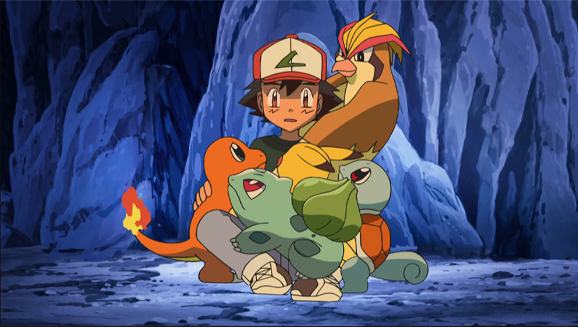

In [ ]:
# Emlékezzünk vissza Ash első 5 pokémonjára...
# Lentebb ezek a képen láthatók. (most Caterpie-t nem számoljuk...)
# A feladat a következő:
# Képességben a lenti 5 pokémonhoz nagyon hasonló másik 5 pokémont szeretnénk találni.
# Például: valami miatt például egy Charmander-t sem sikerül befogni, ezért érdemes lenne valami hasonló tűz pokémont megtalálni.
# Hasonlót abban az értelemben, hogy a csere pokémonnak hasonló értékekkel kéne/kellene rendelkeznie, mint Charmandernek.

# Egy kezdetleges megoldást láttok lentebb, ezt lehet tovább fejleszteni, kell még hozzá pár lépés.
Image(
    filename=Path().absolute()
    / "resources"
    / "ash-ketchums-iconic-traveling-companions-169.png",
    width=600,
)

In [47]:
orig_pokemons = ["Bulbasaur", "Charmander", "Squirtle", "Pikachu", "Pidgeotto"]
attributes = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
csak_charmander = "Charmander"
pokemons_orig = pokemons.copy()

In [48]:
# Charmander értékei
display(pokemons[pokemons["Name"]==csak_charmander][attributes])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
4,39,52,43,60,50,65


In [49]:
temp_df = pokemons[pokemons["Name"]==csak_charmander][attributes]

pokemons["Similarity"] = 0
for col in attributes:
    pokemons["Similarity"] += (pokemons[col] - temp_df[col].values[0])**2
pokemons["Similarity"] = pokemons["Similarity"] ** 0.5

In [50]:
pokemons.sort_values(by="Similarity", ascending=True, inplace=True)
pokemons[pokemons["Type 1"]=="Fire"].head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Similarity
169,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False,0.000000
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.000000
435,390,Chimchar,Fire,NaN,309,44,58,44,58,44,61,4,False,10.862780
721,653,Fennekin,Fire,NaN,307,40,45,40,62,60,60,6,False,13.711309
572,513,Pansear,Fire,NaN,316,50,53,48,53,48,64,5,False,14.177447
42,37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False,21.354157
276,255,Torchic,Fire,NaN,310,45,60,40,70,50,45,3,False,24.677925
63,58,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False,26.627054
735,667,Litleo,Fire,Normal,369,62,50,58,73,54,72,6,False,31.496031
259,240,Magby,Fire,NaN,365,45,75,37,70,55,83,2,False,32.403703
